<a href="https://colab.research.google.com/github/subratamondal1/project_recognizing_handwritten_digits/blob/main/recognizing_handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Project -- Recognizing Handwritten Digits

## Introduction
We will build a Neural Network that can recognize handwritten numbers. To achieve this goal, we use **MNIST**, a database of handwritten digits made up of a training set of **60,000** examples, and a test set of 10,000 examples. The training examples are annotated by humans with the correct answer. For instance, if the handwritten digit is the number “3,” then 3 is simply the label associated with that example.
* **`Supervised Learning ---`** a type of machine learning that uses labeled data to train a model that can classify data or predict outcomes.
* Each MNIST image is in **grayscale** and consists of **28 x 28** pixels.

## Defining a Simple Neural Network
We start with a very simple neural network and then progressively improve it.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image

### Import Dataset

In [2]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training Data: {X_train.shape}")
print(f"Testing Data: {X_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
Training Data: (60000, 28, 28)
Testing Data: (10000, 28, 28)


### Display Data

Text(0.5, 1.0, '1')

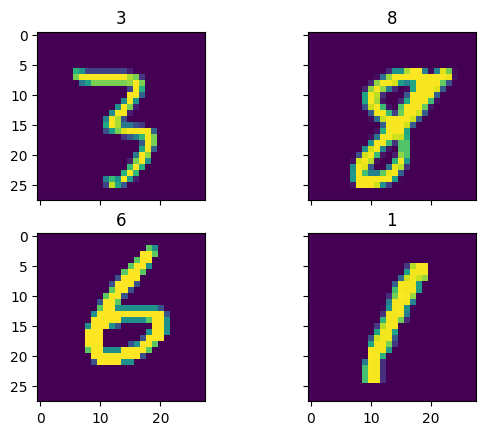

In [3]:
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True)
axs[0,0].imshow(X_train[44])
axs[0,0].set_title(y_train[44])

axs[0,1].imshow(X_train[55])
axs[0,1].set_title(y_train[55])

axs[1,0].imshow(X_train[66])
axs[1,0].set_title(y_train[66])

axs[1,1].imshow(X_train[77])
axs[1,1].set_title(y_train[77])

### Model Scores Storage
This pandas dataframe will track the score of the different models trained.

In [4]:
# Create a dataframe of zeroes with 3 columns and 4 rows
model_scores = pd.DataFrame(0, index=['Model1'],
                            columns=["Epochs","Training Score", "Validation Score", "Testing Score"])

# Display the dataframe
model_scores

,Epochs,Training Score,Validation Score,Testing Score
Model1,0,0,0,0


In [5]:
# Network and Train
EPOCHS = 100
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION

# X_train is 60000 rows of 28x28 values; we  --> reshape it to 60000 x 784.
RESHAPED = 784 # 28x28 = 784
# the reshaped DATA will have a shape of (60000, 784), where each row is a vector representation of an image.
X_train = X_train.reshape(X_train.shape[0], RESHAPED)
X_test = X_test.reshape(X_test.shape[0], RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize inputs in range [0,1]
X_train /= 255
X_test /= 255

print(X_train.shape[0], "Train Samples")
print(X_test.shape[0], "Test Samples")

# One Hot representation of the data
y_train = keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = keras.utils.to_categorical(y_test, NB_CLASSES)

60000 Train Samples
10000 Test Samples


In [6]:
# Build the model.
model1 = tf.keras.models.Sequential()
model1.add(
    keras.layers.Dense(NB_CLASSES,
    input_shape=(RESHAPED,),
    name='dense_layer',
    activation='softmax'))

In [7]:
# Compiling the model.
model1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Training the model.
history1 = model1.fit(X_train, y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/100
375/375 [==============================] - 6s 12ms/step - loss: 1.3676 - accuracy: 0.6822 - val_loss: 0.8881 - val_accuracy: 0.8328
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 0.7872 - accuracy: 0.8311 - val_loss: 0.6545 - val_accuracy: 0.8602
Epoch 3/100
375/375 [==============================] - 3s 7ms/step - loss: 0.6402 - accuracy: 0.8504 - val_loss: 0.5611 - val_accuracy: 0.8699
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.5690 - accuracy: 0.8606 - val_loss: 0.5086 - val_accuracy: 0.8776
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.5255 - accuracy: 0.8681 - val_loss: 0.4749 - val_accuracy: 0.8826
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.4955 - accuracy: 0.8738 - val_loss: 0.4508 - val_accuracy: 0.8874
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.4732 - accuracy: 0.8775 - val_loss: 0.4329 - val_accuracy: 0.891

In [9]:
# Print the last values of the training and validation scores
print("Training accuracy: ", history1.history['accuracy'][-1])
print("Validation accuracy: ", history1.history['val_accuracy'][-1])

Training accuracy:  0.9177916646003723
Validation accuracy:  0.9193333387374878


In [10]:
#evaluate the model
test_loss, test_acc = model1.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2883 - accuracy: 0.9213
Test accuracy: 0.9212999939918518


In [11]:
train_score = np.round(history1.history['accuracy'][-1] * 100)
val_score = np.round(history1.history['val_accuracy'][-1] * 100)
test_score = np.round(test_acc * 100)

# Store the scores of the Model1
model_scores.loc["Model1"] = [EPOCHS,train_score, val_score, test_score]

# Rename the index
model_scores

,Epochs,Training Score,Validation Score,Testing Score
Model1,100,92,92,92


In [12]:
np.round(history1.history['accuracy'][-1] * 100)

92.0

## Improving the simple net in TensorFlow with hidden layers

In [13]:
# Network and training.
EPOCHS = 100
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION

In [14]:
# Loading MNIST dataset.
# Labels have one-hot representation.
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784.
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize inputs to be within in [0, 1].
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Labels have one-hot representation.
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

60000 train samples
10000 test samples


In [15]:
# Build the model.
model2 = tf.keras.models.Sequential()

model2.add(
    keras.layers.Dense(N_HIDDEN,
    input_shape=(RESHAPED,),
    name='dense_layer',
    activation='relu'))

model2.add(
    keras.layers.Dense(N_HIDDEN,
    name='dense_layer_2',
    activation='relu'))

model2.add(
    keras.layers.Dense(NB_CLASSES,
    name='dense_layer_3',
    activation='softmax'))

# Summary of the model.
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compiling the model.
model2.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [17]:
# Training the model.
history2 = model2.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE, epochs=EPOCHS,
    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/100
375/375 [==============================] - 3s 7ms/step - loss: 1.4401 - accuracy: 0.6428 - val_loss: 0.7270 - val_accuracy: 0.8430
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.5857 - accuracy: 0.8560 - val_loss: 0.4501 - val_accuracy: 0.8824
Epoch 3/100
375/375 [==============================] - 3s 7ms/step - loss: 0.4326 - accuracy: 0.8839 - val_loss: 0.3698 - val_accuracy: 0.8992
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3739 - accuracy: 0.8966 - val_loss: 0.3318 - val_accuracy: 0.9071
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3406 - accuracy: 0.9040 - val_loss: 0.3085 - val_accuracy: 0.9130
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3181 - accuracy: 0.9094 - val_loss: 0.2926 - val_accuracy: 0.9175
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3004 - accuracy: 0.9147 - val_loss: 0.2781 - val_accuracy: 0.9220

In [18]:
# Print the last values of the training and validation scores
print("Training accuracy: ", history2.history['accuracy'][-1])
print("Validation accuracy: ", history2.history['val_accuracy'][-1])

Training accuracy:  0.987291693687439
Validation accuracy:  0.9700833559036255


In [19]:
# Evaluating the model.
test_loss, test_acc = model2.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9738
Test accuracy: 0.973800003528595


In [20]:
train_score = np.round(history2.history['accuracy'][-1] * 100)
val_score = np.round(history2.history['val_accuracy'][-1] * 100)
test_score = np.round(test_acc * 100)

# Store the scores of the Model1
model_scores.loc["Model2"] = [EPOCHS,train_score, val_score, test_score]

# Rename the index
model_scores

,Epochs,Training Score,Validation Score,Testing Score
Model1,100.0,92.0,92.0,92.0
Model2,100.0,99.0,97.0,97.0


## Further improving the simple net in TensorFlow with dropout
**Dropout** is a technique to improve the performance of deep learning models *by reducing overfitting.* Overfitting is when a model learns the noise or specific patterns in the training data that do not generalize well to new or unseen data.

* Dropout works by randomly dropping out some units or neurons in a layer during each training step, which prevents co-adaptation of features and forces the model to learn more robust representations.

* Dropout also acts as a form of regularization, which means it reduces the complexity of the model and shrinks the weights towards zero.

* Dropout can be applied to different types of layers in a neural network, such as fully-connected, convolutional, or recurrent layers. The rate of dropout is usually a fraction between 0 and 1 that specifies the probability of each unit being dropped out. A common value for the dropout rate is 0.5, but it can be tuned depending on the problem and the architecture of the model.

* Dropout is implemented in Python with Keras using the `tf.keras.layers.Dropout` function, which takes the dropout rate as an argument.

In [21]:
# Network and training.
EPOCHS = 100
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION DROPOUT = 0.3
DROPOUT = 0.3

In [22]:
# Loading MNIST dataset.
# Labels have one-hot representation.
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784.
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize inputs to be within in [0, 1].
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Labels have one-hot representation.
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

60000 train samples
10000 test samples


In [23]:
# Building the model.
model3 = tf.keras.models.Sequential()

model3.add(
    keras.layers.Dense(N_HIDDEN,
    input_shape=(RESHAPED,),
    name='dense_layer',
    activation='relu'))

model3.add(
    keras.layers.Dropout(DROPOUT))

model3.add(
    keras.layers.Dense(N_HIDDEN,
    name='dense_layer_2',
    activation='relu'))

model3.add(
    keras.layers.Dropout(DROPOUT))

model3.add(
    keras.layers.Dense(NB_CLASSES,
    name='dense_layer_3',
    activation='softmax'))

# Summary of the model.
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compiling the model.
model3.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [25]:
# Training the model.
history3 = model3.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE, epochs=EPOCHS,
    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 1.7616 - accuracy: 0.4317 - val_loss: 0.9521 - val_accuracy: 0.7987
Epoch 2/100
375/375 [==============================] - 3s 7ms/step - loss: 0.9353 - accuracy: 0.7130 - val_loss: 0.5462 - val_accuracy: 0.8659
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.6928 - accuracy: 0.7874 - val_loss: 0.4307 - val_accuracy: 0.8877
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.5931 - accuracy: 0.8203 - val_loss: 0.3748 - val_accuracy: 0.8992
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.5341 - accuracy: 0.8388 - val_loss: 0.3389 - val_accuracy: 0.9055
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.4882 - accuracy: 0.8553 - val_loss: 0.3142 - val_accuracy: 0.9111
Epoch 7/100
375/375 [==============================] - 3s 8ms/step - loss: 0.4555 - accuracy: 0.8655 - val_loss: 0.2949 - val_accuracy: 0.9168

In [26]:
# Print the last values of the training and validation scores
print("Training accuracy: ", history3.history['accuracy'][-1])
print("Validation accuracy: ", history3.history['val_accuracy'][-1])

Training accuracy:  0.9634791612625122
Validation accuracy:  0.9732499718666077


In [27]:
# Evaluating the model.
test_loss, test_acc = model3.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0889 - accuracy: 0.9737
Test accuracy: 0.9736999869346619


In [28]:
train_score = np.round(history3.history['accuracy'][-1] * 100)
val_score = np.round(history3.history['val_accuracy'][-1] * 100)
test_score = np.round(test_acc * 100)

# Store the scores of the Model1
model_scores.loc["Model3"] = [EPOCHS,train_score, val_score, test_score]

# Rename the index
model_scores

,Epochs,Training Score,Validation Score,Testing Score
Model1,100.0,92.0,92.0,92.0
Model2,100.0,99.0,97.0,97.0
Model3,100.0,96.0,97.0,97.0


# Let's try different optimizers
* **Adam optimizers** are a type of optimization algorithm that are widely used in deep learning. They are based on adaptive estimation of first-order and second-order moments, which means they adjust the learning rate of each parameter according to its past gradients and momentum. Adam optimizers are known for being computationally efficient, having little memory requirement, and being well suited for large-scale problems.


In [29]:
# Network and training.
EPOCHS = 10
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION DROPOUT = 0.3
DROPOUT = 0.3

# Loading MNIST dataset.
# Labels have one-hot representation.
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784.
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize inputs to be within in [0, 1].
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Labels have one-hot representation.
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

# Building the model.
model4 = tf.keras.models.Sequential()

model4.add(
    keras.layers.Dense(N_HIDDEN,
    input_shape=(RESHAPED,),
    name='dense_layer',
    activation='relu'))

model4.add(
    keras.layers.Dropout(DROPOUT))

model4.add(
    keras.layers.Dense(N_HIDDEN,
    name='dense_layer_2',
    activation='relu'))

model4.add(
    keras.layers.Dropout(DROPOUT))

model4.add(
    keras.layers.Dense(NB_CLASSES,
    name='dense_layer_3',
    activation='softmax'))

# Summary of the model.
model4.summary()

# Compiling the model.
model4.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max')


# Training the model.
history4 = model4.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE, epochs=EPOCHS,
    verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
    callbacks = [checkpoint]
    )


# Evaluating the model.
test_loss, test_acc = model4.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1

In [30]:
# Print the last values of the training and validation scores
print("Training accuracy: ", history4.history['accuracy'][-1])
print("Validation accuracy: ", history4.history['val_accuracy'][-1])

Training accuracy:  0.973645806312561
Validation accuracy:  0.9759166836738586


In [31]:
train_score = np.round(history4.history['accuracy'][-1] * 100)
val_score = np.round(history4.history['val_accuracy'][-1] * 100)
test_score = np.round(test_acc * 100)

# Store the scores of the Model1
model_scores.loc["Model4"] = [EPOCHS,train_score, val_score, test_score]

# Rename the index
model_scores

,Epochs,Training Score,Validation Score,Testing Score
Model1,100.0,92.0,92.0,92.0
Model2,100.0,99.0,97.0,97.0
Model3,100.0,96.0,97.0,97.0
Model4,10.0,97.0,98.0,98.0


### Save the trained model

In [32]:
# Save the entire model in Keras format
model4.save('final_model.keras')

In [33]:
model_final = tf.keras.models.load_model('final_model.keras')

This code will create two files: `best_model.keras` and `final_model.keras`, which contain the model's architecture, weights, optimizer, and losses.

In [34]:
model_scores

,Epochs,Training Score,Validation Score,Testing Score
Model1,100.0,92.0,92.0,92.0
Model2,100.0,99.0,97.0,97.0
Model3,100.0,96.0,97.0,97.0
Model4,10.0,97.0,98.0,98.0


In [37]:
model_scores.to_csv("models_scores.csv")